# Градијентни спуст

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/Petlja/specit4_ai_radni/blob/main/градијентни_спуст.ipynb)

Ова свеска прати садржај лекције о градијентном спусту. У њој можеш да покренеш симулацију градијентног спуста и опробаш шта се догађа за различита подешавања корака учења. Можеш да експериментишеш и са вредностима других подешавања и стекнеш бољу представу како овај алгоритам функционише.

Учитај прво библиотеке које ће бити потребне у даљем раду.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Интуиција градијентног спуста

У следећим двема ћелијама су дефинисане функција $f(x)=(x-1)^2$ и њен извод $f'(x)=2x-2$. Изврши их да би даље могао да користиш функције.

In [2]:
def f(x):
  return (x-1)**2

In [3]:
f(3)

4

In [4]:
def f_izvod(x):
  return 2*x-2

In [5]:
f(1)

0

Део који следи омогућава да пратиш шта се догађа у појединачним корацима градијентног спуста.

У овој ћелији можеш да поставиш почетну вредност тачке `x0` и вредност корака учења `alfa`. Сваки пут када нешто промениш изврши и доње ћелије.

In [6]:
x0 = 3
alfa = 0.25

Низ `tacke` ће садржати вредности које се добијају појединачним корацима спуста. Њих ћемо моћи да прикажемо користећи функцију `prikazi_grafik`.

In [7]:
tacke = [x0]

In [8]:
def prikazi_grafik(f, iteracija=0, prikazi_prelaz=False):
  x = np.linspace(-4, 6, 100, endpoint=True)
  y = f(x)

  plt.xticks(np.arange(-4, 6), np.arange(-4, 6))
  plt.plot(x, y)

  for t in tacke:
    plt.scatter(t, f(t), color='red')

  if prikazi_prelaz == True:
    broj_tacaka = len(tacke)
    for i in range(0, broj_tacaka-1):
      plt.plot([tacke[i], tacke[i+1]], [f(tacke[i]), f(tacke[i+1])], linestyle='--', color='gray')


  plt.title('Iteracija broj: {iteracija}: '.format(iteracija=iteracija))
  plt.show()

Функција `jedan_korak_spusta` израчунава вредност за `x` у које ћемо се померити једним кораком градијентног спуста. Изврши ћелију да би могао да је користиш.

In [9]:
def jedan_korak_spusta(f, f_izvod, x, alfa):
  x_novo = x - alfa * f_izvod(x)

  return x_novo

Узастопним извршавањем доње ћелије можеш да пратиш како се врши спуст ка минимуму функције.

In [10]:
iteracija = 1

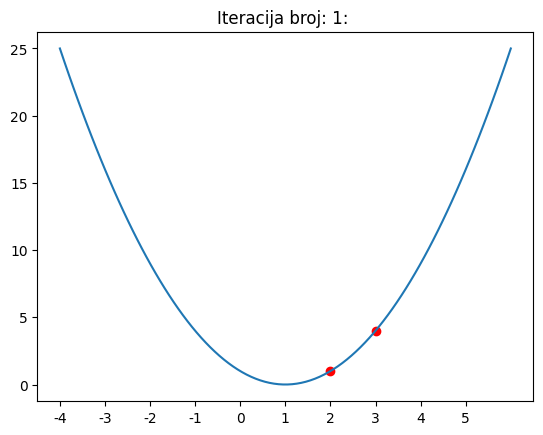

In [11]:
# izracunava se nova tacka
x = jedan_korak_spusta(f, f_izvod, x0, alfa)

# tacka se dodaje u niz tacaka
tacke.append(x)

# prikazuje se grafik
prikazi_grafik(f, iteracija, prikazi_prelaz=False)

# uvecava se redni broj iteracije
iteracija = iteracija + 1

# postavlja se pozicija narednog spusta
x0 = x


Можеш сада да се вратиш на почетак и пробаш следеће вредности:
*   `x0=3` и `alfa=0.05` - то ће бити тест стрпљења због спорог спуста!
*   `x0=3` и `alfa=1.05` - то ће бити изненађење јер спуста заправо нема!
*   `x0=5` и `alfa=0.9` - тако ћеш видети шта значи цик-цак замка!

У овим експериментима обавезно у функцији `prikazi_grafik` постави аргумент `prikazi_prelaz` на вредност `True` како би могао да испратиш путању тачке.

## Алгоритам градијентног спуста

Ова ћелија садржи сва подешавања за функцију градијентног спуста.

In [12]:
x0 = 3
alfa = 0.1
epsilon = 0.001
max_broj_iteracija = 100

Ова ћелија садржи имплементацију функције градијентног спуста. Када је извршиш, моћи ћеш одмах да прочиташ за које је то x вредност функције најмања. Обавезно испитај како се мења резултат за различита подешавања овог алгоритма. Рецимо, за неке комбинације корака учења и стартне тачке спуст ће бити јако спор.

In [13]:
def gradijentni_spust(f, f_izvod, x, alfa, epsilon, max_broj_iteracija):

    # postavljamo pocetnu vrednost za x
    x_staro = x

    # u svakoj iteraciji ...
    for i in range(0, max_broj_iteracija):

        # izracunavamo tekucu vrednost za x
        x_novo = x_staro - alfa * f_izvod(x_staro)

        # i potom proveravamo da li je ispunjen zaustavni kriterijum
        if np.abs(f(x_novo) - f(x_staro)) < epsilon:
            break

        # ako kriterijum nije ispunjen, pripremamo x za narednu iteraciju
        x_staro = x_novo

    # na kraju celog postupka pripremamo izvestaj sa informacijama:
    # da li se algoritam zaustavlja,
    # koliko je iteracija trajao,
    # i koja vrednost x je pronadjena
    izvestaj = {}
    izvestaj['zaustavlja_se'] = i != max_broj_iteracija
    izvestaj['broj_iteracija'] = i
    izvestaj['x_min'] = x_staro

    return izvestaj


Извештај функције нам исписује да ли се алгоритам зауставио (тј. да ли је остварена жељена тачност израчунавања), колико му је итерација требало и која је то тачка у којој је вредност функције најмања. Изврши наредне ћелија да би генерисао извештај.

In [14]:
izvestaj = gradijentni_spust(f, f_izvod, x0, alfa, epsilon, max_broj_iteracija)

In [15]:
izvestaj

{'zaustavlja_se': True, 'broj_iteracija': 17, 'x_min': 1.045035996273705}

## Потрага за параметрима $\beta_0$ и $\beta_1$

Као што смо научили, за задати скуп тачака $(x, y)$ средњеквадратна грешка се рачуна као сума квадрата разлика очекиваних вредности и предикција модела по формули $\frac{1}{N}\sum_{i=1}^N (y_i - (\beta_0 + \beta_1x_i))^2$ тј. $\frac{1}{N} \sum_{i=1}^N (y_i -\beta_0 - \beta_1x_i)^2$. Циљ нам је да одредимо вредности параметра $\beta_0$ и $\beta_1$ за које је вредност ове функције најмања. Јасно је да ће и функција $\frac{1}{2N} \sum_{i=1}^N (y_i -\beta_0 - \beta_1x_i)^2$ за те вредности имати најмању вредност па се њен облик много чешће користи због финијих облика градијента. Зато ћемо њу користити у наставку.

Пратећи ову формулу, функција `srednjekvadratna_greska` за задате аргументе $\beta_0$, $\beta_1$, $x$ и $y$ израчунава вредност средњеквадратне грешке.  Ово је уједно и функција за коју желимо да пронађемо минимум техником градијентног спуста.

In [16]:
def srednjekvadratna_greska(beta0, beta1, x, y):
    return 0.5*np.average((y - beta0 - beta1*x)**2)

Минимизацију грешке треба извршити по параметрима $\beta_0$ i $\beta_1$. Зато ће нам бити потребни и градијенти ове функције по $\beta_0$ i $\beta_1$. Може се проверити да је то вектор $[-\frac{1}{N} \sum_{i=1}^{N}(y_i - \beta_0-\beta_1x_i), -\frac{1}{N} \sum_{i=1}^{N}(y_i - \beta_0 -\beta_1x_i)\cdot x_i]$. Уколико минусом прођемо кроз суму због једноставнијег рачунања добијамо вектор $[\frac{1}{N} \sum_{i=1}^{N}(\beta_0 + \beta_1x_i - y_i), \frac{1}{N} \sum_{i=1}^{N}(\beta_0 + \beta_1x_i - y_i)\cdot x_i]$.

Сада ћемо се бацити на посао прилагођавања функције градијентног спуста за задатак линеарне регресије. Треба да водимо рачуна да имамо две променљиве `beta0` и `beta1` и да је функција чији минимум тражимо баш средњеквадратна грешка.

In [17]:
def gradijentni_spust_linearne_regresije(x, y, srednjekvadratna_greska, beta0, beta1, alfa, epsilon, max_broj_iteracija, plot=False):

    # postavljamo pocetnu vrednost za beta0 i beta1
    beta0_staro = beta0
    beta1_staro = beta1

    # izracunavamo pocetnu vrednost funkcije greske
    greska_staro = srednjekvadratna_greska(beta0_staro, beta1_staro, x, y)

    # da bismo mogli da ispratimo kako se krece vrednost funkcije greske
    # cuvacemo sve izracunate vrednosti u nizu greske
    greske = [greska_staro]

     # u svakoj iteraciji ...
    for i in np.arange(0, max_broj_iteracija):

        # izracunavamo tekucu vrednost za beta0 i beta1 tako sto:

        # prvo izracunavamo vrednosti pravaca gradijenata
        beta0_korekcija = np.average(beta0_staro + beta1_staro*x - y)
        beta1_korekcija = np.average((beta0_staro + beta1_staro*x - y)*x)

        # a potom i azuriramo vrednosti za beta0 i beta1
        beta0_novo = beta0_staro - alfa*beta0_korekcija
        beta1_novo = beta1_staro - alfa*beta1_korekcija

        # za ovako izracunate vrednosti izracunavamo i vrednost
        # srednjekvadratne greske
        greska_novo = srednjekvadratna_greska(beta0_novo, beta1_novo, x, y)


        # i potom proveravamo da li je ispunjen zaustavni kriterijum
        if np.abs(greska_novo - greska_staro) < epsilon:
            break

        # alternativno se kao zaustavni kriterijum moze koristiti uslov da
        # vrednost gradijenta bude manja od neke unapred zadate vrednosti
        # if np.linalg.norm(np.array([beta0_korekcija, beta1_korekcija])) < epsilon:
        #   break

        # ako kriterijum nije ispunjen, pripremamo beta0 i beta1 za narednu iteraciju
        beta0_staro = beta0_novo
        beta1_staro = beta1_novo

        # pripremamo i vrednost funkcije greske
        greska_staro = greska_novo

        # i dodajemo je u niz sa svim greskama
        greske.append(greska_novo)


    # na kraju celog postupka pripremamo izvestaj sa informacijama:
    # da li se algoritam zaustavlja,
    # koliko je iteracija trajao,
    # i koja vrednost beta0 i beta1 je pronadjena

    izvestaj = {}

    izvestaj['zaustavlja_se'] = i != max_broj_iteracija - 1
    izvestaj['broj_iteracija'] = i
    izvestaj['b_min'] = (beta0_staro, beta1_staro)


    # ukoliko je postavljena vrednost argumenta plot
    # nacrtacemo i grafik funkcije greske u toku pretrage parametara
    if plot == True:
        plt.title('Funkcija greske')
        plt.xlabel('Broj iteracija')
        plt.ylabel('Srednjekvadratna greska')
        plt.plot(np.arange(0, len(greske)), np.log(greske))

    return izvestaj

Поставићемо сада вредности за `x` и `y` тако да одговарају вредностима квадратура некретнина и њихових цена из претходног примера.

In [18]:
x = np.array([43, 25, 66, 80, 105, 70, 40, 85, 84, 102])
y = np.array([60, 32.1, 88.4, 111.4, 120.32, 72.1, 46.3, 90.1, 99.6, 139.2])

Одабраћемо и неке почетне вредности за параметре који фигуришу у алгоритму. Сада је овај задатак доста тежи јер немамо баш јасну представу где да се позиционирамо ни које вредности параметара да одаберемо.

In [67]:
beta0 = 2.5
beta1 = 1.5
alfa = 0.00001
epsilon = 0.000001
max_broj_iteracija = 200

Затим ћемо покренути претрагу позивом функције коју смо припремили.

In [68]:
gradijentni_spust_linearne_regresije(x, y, srednjekvadratna_greska, beta0, beta1, alfa, epsilon, max_broj_iteracija, plot=False)

{'zaustavlja_se': True,
 'broj_iteracija': 151,
 'b_min': (2.4960466912761294, 1.1930132064518595)}

Обавезно испробај шта ће се десити када промениш неке вредности. Опет можеш да очекујеш спор спуст, цик-цак замку или поступак који те не доводи до решења.

У пракси се чешће користе варијанте градијентног спуста са променљивим кораком учења које се воде логиком да када смо сигурни да идемо дуж доброг правца можемо да правимо веће кораке док када смо мање сигурни можемо правити и мање кораке и будемо обазривији. Пракса је и да се у овим алгоритмима користе и технике стандардизације података које би цео процес учиниле нумерички стабилнијим.

Једно такво боље решење који би ови алгоритми пронашли за нас је $\beta_0$=2.056 и $\beta_1$=1.198.